# Evaluation of the models

### Task breakdown:

#### 1. Load Benchmark data for each query.

#### 2. Load Ranked Documents for each query.

#### 3. Evaluate the data

#### 4. Compare the models from the results obtained


### Testing code for evaluating model for 1 query with 1 model's result for that query

For Query R101 with benchmark 'Dataset101' and result with BM25 Model for Query 1 

In [1]:
# load any eval data and model result to test evaluation
query_benchmark_101_file_path = 'EvaluationBenchmark/Dataset107.txt'
bm25model_r101_result ='RankingOutputs/BM25_R107Ranking.dat' 

In [2]:
if __name__ == "__main__":

    import sys
    import os
    #import coll
    #import df


    # task 2 evaluation
    # get the benchmark
    benFile = open(query_benchmark_101_file_path)
    #benFile = open('Training_benchmark.txt')
    file_ = benFile.readlines()
    ben={}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]]=float(lineList[2])
    benFile.close()
    
    # Print the loaded benchmark data
    #print("Loaded Benchmark Data:")
    #print(ben)
    
    # number documents 
    rank1 = {}
    i = 1
    for line in open(bm25model_r101_result):
        line = line.strip()
        lineList = line.split()
        # Strip '.xml' extension from document IDs
        doc_id = lineList[0].replace('.xml', '')
        rank1[str(i)] = doc_id
        i += 1
        
    #Print the loaded ranked documents
    #print("Loaded Ranked Documents:")
    #print(rank1)

    
    # Evaluation
    print("For task 2:")
    ri = 0
    map1 = 0.0
    R = len([id for (id, v) in ben.items() if v > 0])
    if R == 0:
        print("No relevant documents in the benchmark.")
    else:
        for (n, doc_id) in sorted(rank1.items(), key=lambda x: int(x[0])):
            print(f"Evaluating Document ID: {doc_id} at Rank: {n}")
            if doc_id in ben:
                if ben[doc_id] > 0:
                    ri += 1
                    pi = float(ri) / float(int(n))
                    recall = float(ri) / float(R)
                    map1 += pi
                    print(f"At position {int(n)}, precision= {pi}, recall= {recall}")
                else:
                   print(f"Document ID: {doc_id} is found in benchmark but not relevant.")
            else:
                # Instead of printing not found in benchmark for each document, count the not found documents
                print(f"Document ID: {doc_id} is not found in benchmark.")
        if ri > 0:
            map1 = map1 / float(ri)
        else:
            map1 = 0
        print("---The average precision = " + str(map1))

        if ri == 0:
            print("No relevant documents found in the ranked results.")


For task 2:
Evaluating Document ID: 77936 at Rank: 1
At position 1, precision= 1.0, recall= 0.3333333333333333
Evaluating Document ID: 51576 at Rank: 2
Document ID: 51576 is found in benchmark but not relevant.
Evaluating Document ID: 79950 at Rank: 3
At position 3, precision= 0.6666666666666666, recall= 0.6666666666666666
Evaluating Document ID: 59244 at Rank: 4
Document ID: 59244 is found in benchmark but not relevant.
Evaluating Document ID: 86459 at Rank: 5
Document ID: 86459 is found in benchmark but not relevant.
Evaluating Document ID: 31404 at Rank: 6
Document ID: 31404 is found in benchmark but not relevant.
Evaluating Document ID: 41791 at Rank: 7
Document ID: 41791 is found in benchmark but not relevant.
Evaluating Document ID: 37330 at Rank: 8
Document ID: 37330 is found in benchmark but not relevant.
Evaluating Document ID: 18297 at Rank: 9
Document ID: 18297 is found in benchmark but not relevant.
Evaluating Document ID: 18529 at Rank: 10
Document ID: 18529 is found in be

### Now Testing code for evaluating model for all the queries benchmark with BM25 model's results for those querries.

For queries 101 to 150 with benchmarks 101...150 for BM25

In [3]:
import os

def load_benchmark(benchmark_file):
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_ranked_results(results_file):
    rank = {}
    with open(results_file) as f:
        i = 1
        for line in f:
            line = line.strip()
            lineList = line.split()
            # Strip '.xml' extension from document IDs
            doc_id = lineList[0].replace('.xml', '')
            rank[str(i)] = doc_id
            i += 1
    return rank


def evaluate_query(ben, rank1):
    ri = 0
    map1 = 0.0
    R = len([id for (id, v) in ben.items() if v > 0])
    if R == 0:
        return 0, 0, 0  # No relevant documents in the benchmark
    for (n, doc_id) in sorted(rank1.items(), key=lambda x: int(x[0])):
        if doc_id in ben and ben[doc_id] > 0:
            ri += 1
            pi = float(ri) / float(int(n))
            map1 += pi
    if ri > 0:
        map1 = map1 / float(ri)
    else:
        map1 = 0
    recall = float(ri) / float(R) if R > 0 else 0
    return ri, recall, map1

def print_performance_table(performance_data):
    print("\nPerformance Table:")
    print(f"{'Topic':<10} | {'BM25':<10}")
    print("-" * 22)
    for topic, map_value in performance_data:
        print(f"{topic:<10} | {map_value:<10}")

def main():
    query_range = range(101, 151)  # Adjust range as needed
    benchmark_folder = "EvaluationBenchmark"
    results_folder = "RankingOutputs"
    
    total_relevant_items = 0
    total_recall = 0
    total_map = 0
    total_queries = 0

    performance_data = []

    for query_id in query_range:
        benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
        results_file = os.path.join(results_folder, f"BM25_R{query_id}Ranking.dat")
        
        if os.path.exists(benchmark_file) and os.path.exists(results_file):
            ben = load_benchmark(benchmark_file)
            rank1 = load_ranked_results(results_file)
            ri, recall, map1 = evaluate_query(ben, rank1)
            total_relevant_items += ri
            total_recall += recall
            total_map += map1
            total_queries += 1
            print(f"For Query {query_id}: relevant documents (ri)={ri}, recall={recall}, MAP={map1}")
            performance_data.append((f"R{query_id}", map1))
        else:
            print(f"Files for query {query_id} do not exist.")
    
    if total_queries > 0:
        avg_recall = total_recall / total_queries
        avg_map = total_map / total_queries
    else:
        avg_recall = 0
        avg_map = 0

    print(f"\nOverall results for {total_queries} queries:")
    print(f"Total relevant items found: {total_relevant_items}")
    print(f"Average recall: {avg_recall}")
    print(f"Average MAP: {avg_map}")

    # Call the performance table function
    print_performance_table(performance_data)

if __name__ == "__main__":
    main()


For Query 101: relevant documents (ri)=7, recall=1.0, MAP=0.7333333333333333
For Query 102: relevant documents (ri)=135, recall=1.0, MAP=0.7876356092788778
For Query 103: relevant documents (ri)=14, recall=1.0, MAP=0.3898422384750632
For Query 104: relevant documents (ri)=120, recall=1.0, MAP=0.8886058231009184
For Query 105: relevant documents (ri)=16, recall=1.0, MAP=0.5708450998892176
For Query 106: relevant documents (ri)=4, recall=1.0, MAP=0.47175324675324676
For Query 107: relevant documents (ri)=3, recall=1.0, MAP=0.5811965811965811
For Query 108: relevant documents (ri)=3, recall=1.0, MAP=0.17072510822510822
For Query 109: relevant documents (ri)=20, recall=1.0, MAP=0.6407013502392397
For Query 110: relevant documents (ri)=5, recall=1.0, MAP=0.48666666666666664
For Query 111: relevant documents (ri)=3, recall=1.0, MAP=0.12429971988795518
For Query 112: relevant documents (ri)=6, recall=1.0, MAP=1.0
For Query 113: relevant documents (ri)=12, recall=1.0, MAP=0.6813501212957735
Fo

### Now Testing code for evaluating model for all the queries benchmark with JM_LM model's results for those querries.

In [13]:
import os
import pandas as pd

def load_benchmark(benchmark_file):
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_ranked_results(results_file):
    rank = {}
    with open(results_file) as f:
        i = 1
        for line in f:
            line = line.strip()
            lineList = line.split()
            # Strip '.xml' extension from document IDs
            doc_id = lineList[0].replace('.xml', '')
            rank[str(i)] = doc_id
            i += 1
    return rank

def evaluate_map(ben, rank1):
    ri = 0
    map1 = 0.0
    R = len([id for (id, v) in ben.items() if v > 0])
    if R == 0:
        return 0, 0, 0  # No relevant documents in the benchmark
    for (n, doc_id) in sorted(rank1.items(), key=lambda x: int(x[0])):
        if doc_id in ben and ben[doc_id] > 0:
            ri += 1
            pi = float(ri) / float(int(n))
            map1 += pi
    if ri > 0:
        map1 = map1 / float(ri)
    else:
        map1 = 0
    recall = float(ri) / float(R) if R > 0 else 0
    return ri, recall, map1

def create_map_performance_table(query_range, models, benchmark_folder):
    performance_data = {f"R{query_id}": {} for query_id in query_range}

    for model_name, results_pattern in models.items():
        for query_id in query_range:
            benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
            results_file = results_pattern.format(query_id=query_id)
            
            if os.path.exists(benchmark_file) and os.path.exists(results_file):
                ben = load_benchmark(benchmark_file)
                rank1 = load_ranked_results(results_file)
                ri, recall, map1 = evaluate_map(ben, rank1)
                performance_data[f"R{query_id}"][model_name] = map1
            else:
                performance_data[f"R{query_id}"][model_name] = "N/A"

    # Create DataFrame
    df_data = {'Topic': []}
    for model in models:
        df_data[model] = []

    for topic, scores in performance_data.items():
        df_data['Topic'].append(topic)
        for model in models:
            df_data[model].append(scores.get(model, "N/A"))

    df = pd.DataFrame(df_data)
    
    # Calculate the average MAP for each model
    avg_map = {}
    for model in models:
        valid_scores = [score for score in df[model] if score != "N/A"]
        if valid_scores:
            avg_map[model] = sum(valid_scores) / len(valid_scores)
        else:
            avg_map[model] = "N/A"

    # Add a row for the average MAP
    avg_row = {'Topic': 'MAP'}
    for model in models:
        avg_row[model] = avg_map[model]

    df = df.append(avg_row, ignore_index=True)
    
    return df

# Define the query range and models
query_range = range(101, 151)  # Adjust range as needed
benchmark_folder = "EvaluationBenchmark"
models = {
    "BM25": "RankingOutputs/BM25_R{query_id}Ranking.dat",
    "JM_LM": "RankingOutputs/JM_LM_R{query_id}Ranking.dat",
    "MY_PRM": "RankingOutputs/My_PRM_R{query_id}Ranking.dat"
}

# Create MAP Performance Table
map_performance_df = create_map_performance_table(query_range, models, benchmark_folder)
print(map_performance_df.tail())


   Topic      BM25     JM_LM    MY_PRM
46  R147  0.591071  0.341184  0.634325
47  R148  0.477040  0.427533  0.382971
48  R149  0.340000  0.462790  0.222161
49  R150  0.377496  0.312995  0.282258
50   MAP  0.478963  0.462390  0.498892


/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/1501210815.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)


### Precision@10

#### Precision@10 = Number of relevant documents in top 10 results by 10

In [14]:
def load_benchmark(benchmark_file):
    """
    Loads benchmark data from the given file.

    Args:
        benchmark_file (str): Path to the benchmark file.

    Returns:
        dict: A dictionary with document IDs as keys and relevance scores as values.
    """
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_top_10_results(output_file):
    """
    Loads the top 10 results from the given file.

    Args:
        output_file (str): Path to the file containing the top 10 results.

    Returns:
        dict: A dictionary with ranks as keys and document IDs as values.
    """
    top_10_rank = {}
    with open(output_file) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            rank, doc_id = line.split('\t')
            top_10_rank[rank] = doc_id
    return top_10_rank

def evaluate_precision_at_10(ben, top_10_rank):
    """
    Evaluates Precision@10 for the given benchmark data and top 10 results.

    Args:
        ben (dict): Benchmark data with document IDs as keys and relevance scores as values.
        top_10_rank (dict): Top 10 results with ranks as keys and document IDs as values.

    Returns:
        float: Precision@10 score.
    """
    relevant_in_top_10 = 0
    for rank, doc_id in top_10_rank.items():
        if doc_id in ben and ben[doc_id] > 0:
            relevant_in_top_10 += 1
    precision_at_10 = relevant_in_top_10 / 10
    return precision_at_10

def create_precision_at_10_table(query_range, models, benchmark_folder, top_10_results_folder):
    """
    Creates a table with Precision@10 scores for each model and query.

    Args:
        query_range (range): Range of query IDs to evaluate.
        models (dict): Dictionary of models with their result file patterns.
        benchmark_folder (str): Path to the folder containing benchmark files.
        top_10_results_folder (str): Path to the folder containing top 10 results files.

    Returns:
        pandas.DataFrame: DataFrame containing Precision@10 scores for each model and query,
                          along with the average Precision@10 for each model.
    """
    performance_data = {f"R{query_id}": {} for query_id in query_range}

    for model_name in models:
        for query_id in query_range:
            benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
            top_10_file = os.path.join(top_10_results_folder, f"{model_name}_R{query_id}_Top10.dat")
            
            if os.path.exists(benchmark_file) and os.path.exists(top_10_file):
                ben = load_benchmark(benchmark_file)
                top_10_rank = load_top_10_results(top_10_file)
                precision_at_10 = evaluate_precision_at_10(ben, top_10_rank)
                performance_data[f"R{query_id}"][model_name] = precision_at_10
            else:
                performance_data[f"R{query_id}"][model_name] = "N/A"

    # Create DataFrame
    df_data = {'Topic': []}
    for model in models:
        df_data[model] = []

    for topic, scores in performance_data.items():
        df_data['Topic'].append(topic)
        for model in models:
            df_data[model].append(scores.get(model, "N/A"))

    df = pd.DataFrame(df_data)

    # Calculate the average Precision@10 for each model
    avg_precision_at_10 = {}
    for model in models:
        valid_scores = [score for score in df[model] if score != "N/A"]
        if valid_scores:
            avg_precision_at_10[model] = sum(valid_scores) / len(valid_scores)
        else:
            avg_precision_at_10[model] = "N/A"

    # Add a row for the average Precision@10
    avg_row = {'Topic': 'P@10'}
    for model in models:
        avg_row[model] = avg_precision_at_10[model]

    df = df.append(avg_row, ignore_index=True)
    return df

# Define the query range and models
query_range = range(101, 151)  # Adjust range as needed
benchmark_folder = "EvaluationBenchmark"
top_10_results_folder = "Top10Results"
models = {
    "BM25": "RankingOutputs/BM25_R{query_id}Ranking.dat",
    "JM_LM": "RankingOutputs/JM_LM_R{query_id}Ranking.dat",
    "MY_PRM": "RankingOutputs/My_PRM_R{query_id}Ranking.dat"
}

# Create Precision@10 Table
precision_at_10_df = create_precision_at_10_table(query_range, models, benchmark_folder, top_10_results_folder)
print(precision_at_10_df)

   Topic  BM25  JM_LM  MY_PRM
0   R101  0.50  0.500   0.500
1   R102  0.50  0.600   0.500
2   R103  0.20  0.300   0.400
3   R104  0.80  1.000   1.000
4   R105  0.90  0.700   0.900
5   R106  0.30  0.300   0.200
6   R107  0.20  0.200   0.200
7   R108  0.10  0.100   0.200
8   R109  0.60  0.600   0.400
9   R110  0.40  0.100   0.400
10  R111  0.00  0.000   0.000
11  R112  0.60  0.600   0.600
12  R113  0.80  0.700   0.700
13  R114  0.50  0.500   0.500
14  R115  0.20  0.100   0.100
15  R116  0.50  0.300   0.300
16  R117  0.30  0.300   0.300
17  R118  0.30  0.300   0.300
18  R119  0.00  0.200   0.100
19  R120  0.30  0.300   0.500
20  R121  0.50  0.700   0.600
21  R122  0.40  0.500   0.400
22  R123  0.20  0.100   0.200
23  R124  0.20  0.400   0.300
24  R125  0.70  0.600   0.700
25  R126  0.50  0.500   0.500
26  R127  0.30  0.300   0.500
27  R128  0.10  0.100   0.100
28  R129  0.70  0.700   0.700
29  R130  0.30  0.300   0.300
30  R131  0.10  0.200   0.200
31  R132  0.40  0.400   0.300
32  R133  

/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/1247454007.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)


### DCG, p=10 

In [15]:
import math
def load_benchmark(benchmark_file):
    """
    Loads benchmark data from the given file.

    Args:
        benchmark_file (str): Path to the benchmark file.

    Returns:
        dict: A dictionary with document IDs as keys and relevance scores as values.
    """
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_top_10_results(output_file):
    """
    Loads the top 10 results from the given file.

    Args:
        output_file (str): Path to the file containing the top 10 results.

    Returns:
        dict: A dictionary with ranks as keys and document IDs as values.
    """
    top_10_rank = {}
    with open(output_file) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            rank, doc_id = line.split('\t')
            top_10_rank[rank] = doc_id
    return top_10_rank

def evaluate_dcg_at_10(ben, top_10_rank):
    """
    Evaluates DCG@10 for the given benchmark data and top 10 results.

    Args:
        ben (dict): Benchmark data with document IDs as keys and relevance scores as values.
        top_10_rank (dict): Top 10 results with ranks as keys and document IDs as values.

    Returns:
        float: DCG@10 score.
    """
    dcg = 0.0
    for rank, doc_id in top_10_rank.items():
        rank = int(rank)
        if doc_id in ben:
            rel = ben[doc_id]
            if rank == 1:
                dcg += rel
            else:
                dcg += rel / math.log2(rank + 1)
    return dcg

def create_dcg_at_10_table(query_range, models, benchmark_folder, top_10_results_folder):
    """
    Creates a table with DCG@10 scores for each model and query.

    Args:
        query_range (range): Range of query IDs to evaluate.
        models (dict): Dictionary of models with their result file patterns.
        benchmark_folder (str): Path to the folder containing benchmark files.
        top_10_results_folder (str): Path to the folder containing top 10 results files.

    Returns:
        pandas.DataFrame: DataFrame containing DCG@10 scores for each model and query,
                          along with the average DCG@10 for each model.
    """
    performance_data = {f"R{query_id}": {} for query_id in query_range}

    for model_name in models:
        for query_id in query_range:
            benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
            top_10_file = os.path.join(top_10_results_folder, f"{model_name}_R{query_id}_Top10.dat")
            
            if os.path.exists(benchmark_file) and os.path.exists(top_10_file):
                ben = load_benchmark(benchmark_file)
                top_10_rank = load_top_10_results(top_10_file)
                dcg_at_10 = evaluate_dcg_at_10(ben, top_10_rank)
                performance_data[f"R{query_id}"][model_name] = dcg_at_10
            else:
                performance_data[f"R{query_id}"][model_name] = "N/A"

    # Create DataFrame
    df_data = {'Topic': []}
    for model in models:
        df_data[model] = []

    for topic, scores in performance_data.items():
        df_data['Topic'].append(topic)
        for model in models:
            df_data[model].append(scores.get(model, "N/A"))

    df = pd.DataFrame(df_data)

    # Calculate the average DCG@10 for each model
    avg_dcg_at_10 = {}
    for model in models:
        valid_scores = [score for score in df[model] if score != "N/A"]
        if valid_scores:
            avg_dcg_at_10[model] = sum(valid_scores) / len(valid_scores)
        else:
            avg_dcg_at_10[model] = "N/A"

    # Add a row for the average DCG@10
    avg_row = {'Topic': 'DCG@10'}
    for model in models:
        avg_row[model] = avg_dcg_at_10[model]

    df = df.append(avg_row, ignore_index=True)
    return df

# Define the query range and models
query_range = range(101, 151)  # Adjust range as needed
benchmark_folder = "EvaluationBenchmark"
top_10_results_folder = "Top10Results"
models = {
    "BM25": "RankingOutputs/BM25_R{query_id}Ranking.dat",
    "JM_LM": "RankingOutputs/JM_LM_R{query_id}Ranking.dat",
    "MY_PRM": "RankingOutputs/My_PRM_R{query_id}Ranking.dat"
}

# Create DCG@10 Table
dcg_at_10_df = create_dcg_at_10_table(query_range, models, benchmark_folder, top_10_results_folder)
print(dcg_at_10_df)

     Topic      BM25     JM_LM    MY_PRM
0     R101  2.237524  2.237524  2.850671
1     R102  2.105696  2.441211  2.718843
2     R103  0.919995  1.265293  1.689455
3     R104  3.939030  4.543559  4.543559
4     R105  4.156707  3.354019  3.543559
5     R106  2.061606  1.930677  1.430677
6     R107  1.500000  1.430677  1.500000
7     R108  0.333333  0.301030  0.675918
8     R109  2.951893  3.263924  2.448459
9     R110  1.279635  0.315465  1.673737
10    R111  0.000000  0.000000  0.000000
11    R112  3.109535  3.189455  3.304666
12    R113  3.867642  3.566612  3.467166
13    R114  2.877071  2.948459  2.802602
14    R115  0.931960  0.630930  0.430677
15    R116  2.403379  1.622398  1.746141
16    R117  1.964263  1.719741  1.930677
17    R118  1.817529  1.448459  1.448459
18    R119  0.000000  0.648798  0.301030
19    R120  1.058525  1.044090  2.233278
20    R121  2.948459  3.464085  3.152146
21    R122  1.972702  2.238893  1.972702
22    R123  0.789065  0.630930  1.289065
23    R124  1.38

/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/2401960916.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)


### Exporting results as CSV

In [16]:
import math

def export_to_csv(df, filename):
    """
    Exports the given DataFrame to a CSV file.

    Args:
        df (pandas.DataFrame): DataFrame to export.
        filename (str): Name of the CSV file.
    """
    df.to_csv(filename, index=False)
    print(f"DataFrame exported to {filename}")
    
    return 

# Export the precision  DataFrame to CSV
export_to_csv(map_performance_df, "PerformanceResultCSV/map_performance_df_results.csv")

# Export the Precision@10 DataFrame to CSV
export_to_csv(precision_at_10_df, "PerformanceResultCSV/precision_at_10_results.csv")

# Export the DCG;p=10 DataFrame to CSV
export_to_csv(dcg_at_10_df, "PerformanceResultCSV/DCG_at_10_results.csv")

DataFrame exported to PerformanceResultCSV/map_performance_df_results.csv
DataFrame exported to PerformanceResultCSV/precision_at_10_results.csv
DataFrame exported to PerformanceResultCSV/DCG_at_10_results.csv


### Evaluation system prototype

In [8]:
import os
import pandas as pd
import math

def load_benchmark(benchmark_file):
    """
    Loads benchmark data from the given file.

    Args:
        benchmark_file (str): Path to the benchmark file.

    Returns:
        dict: A dictionary with document IDs as keys and relevance scores as values.
    """
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_ranked_results(results_file):
    """
    Loads the ranked results from the given file.

    Args:
        results_file (str): Path to the file containing ranked results.

    Returns:
        dict: A dictionary with ranks as keys and document IDs as values.
    """
    rank = {}
    with open(results_file) as f:
        i = 1
        for line in f:
            line = line.strip()
            lineList = line.split()
            # Strip '.xml' extension from document IDs
            doc_id = lineList[0].replace('.xml', '')
            rank[str(i)] = doc_id
            i += 1
    return rank

def evaluate_query_map(ben, rank1):
    """
    Evaluates MAP for the given benchmark data and ranked results.

    Args:
        ben (dict): Benchmark data with document IDs as keys and relevance scores as values.
        rank1 (dict): Ranked results with ranks as keys and document IDs as values.

    Returns:
        tuple: ri, recall, and MAP score.
    """
    ri = 0
    map1 = 0.0
    R = len([id for (id, v) in ben.items() if v > 0])
    if R == 0:
        return 0, 0, 0  # No relevant documents in the benchmark
    for (n, doc_id) in sorted(rank1.items(), key=lambda x: int(x[0])):
        if doc_id in ben and ben[doc_id] > 0:
            ri += 1
            pi = float(ri) / float(int(n))
            map1 += pi
    if ri > 0:
        map1 = map1 / float(ri)
    else:
        map1 = 0
    recall = float(ri) / float(R) if R > 0 else 0
    return ri, recall, map1

def evaluate_query_precision_at_10(ben, rank1):
    """
    Evaluates Precision@10 for the given benchmark data and ranked results.

    Args:
        ben (dict): Benchmark data with document IDs as keys and relevance scores as values.
        rank1 (dict): Ranked results with ranks as keys and document IDs as values.

    Returns:
        float: Precision@10 score.
    """
    relevant_in_top_10 = 0
    for n in range(1, 11):
        if str(n) in rank1 and rank1[str(n)] in ben and ben[rank1[str(n)]] > 0:
            relevant_in_top_10 += 1
    return relevant_in_top_10 / 10.0

def evaluate_query_dcg_at_10(ben, rank1):
    """
    Evaluates DCG@10 for the given benchmark data and ranked results.

    Args:
        ben (dict): Benchmark data with document IDs as keys and relevance scores as values.
        rank1 (dict): Ranked results with ranks as keys and document IDs as values.

    Returns:
        float: DCG@10 score.
    """
    dcg = 0.0
    for rank, doc_id in rank1.items():
        rank = int(rank)
        if rank > 10:
            break
        if doc_id in ben:
            rel = ben[doc_id]
            if rank == 1:
                dcg += rel
            else:
                dcg += rel / math.log2(rank + 1)
    return dcg

def create_performance_table(query_range, models, benchmark_folder):
    """
    Creates a performance table with MAP, Precision@10, and DCG@10 scores for each model and query.

    Args:
        query_range (range): Range of query IDs to evaluate.
        models (dict): Dictionary of models with their result file patterns.
        benchmark_folder (str): Path to the folder containing benchmark files.

    Returns:
        pandas.DataFrame: DataFrame containing MAP, Precision@10, and DCG@10 scores for each model and query,
                          along with the average scores for each model.
    """
    performance_data = {f"R{query_id}": {} for query_id in query_range}

    for model_name, results_pattern in models.items():
        for query_id in query_range:
            benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
            results_file = results_pattern.format(query_id=query_id)
            
            if os.path.exists(benchmark_file) and os.path.exists(results_file):
                ben = load_benchmark(benchmark_file)
                rank1 = load_ranked_results(results_file)
                
                ri, recall, map1 = evaluate_query_map(ben, rank1)
                precision_at_10 = evaluate_query_precision_at_10(ben, rank1)
                dcg_at_10 = evaluate_query_dcg_at_10(ben, rank1)
                
                performance_data[f"R{query_id}"][f"{model_name}_MAP"] = map1
                performance_data[f"R{query_id}"][f"{model_name}_P@10"] = precision_at_10
                performance_data[f"R{query_id}"][f"{model_name}_DCG@10"] = dcg_at_10
            else:
                performance_data[f"R{query_id}"][f"{model_name}_MAP"] = "N/A"
                performance_data[f"R{query_id}"][f"{model_name}_P@10"] = "N/A"
                performance_data[f"R{query_id}"][f"{model_name}_DCG@10"] = "N/A"

    # Create DataFrame
    df_data = {'Topic': []}
    for model in models:
        df_data[f"{model}_MAP"] = []
        df_data[f"{model}_P@10"] = []
        df_data[f"{model}_DCG@10"] = []

    for topic, scores in performance_data.items():
        df_data['Topic'].append(topic)
        for model in models:
            df_data[f"{model}_MAP"].append(scores.get(f"{model}_MAP", "N/A"))
            df_data[f"{model}_P@10"].append(scores.get(f"{model}_P@10", "N/A"))
            df_data[f"{model}_DCG@10"].append(scores.get(f"{model}_DCG@10", "N/A"))

    df = pd.DataFrame(df_data)
    
    # Calculate the average MAP, Precision@10, and DCG@10 for each model
    avg_scores = {f"{model}_{metric}": "N/A" for model in models for metric in ["MAP", "P@10", "DCG@10"]}
    for model in models:
        for metric in ["MAP", "P@10", "DCG@10"]:
            valid_scores = [score for score in df[f"{model}_{metric}"] if score != "N/A"]
            if valid_scores:
                avg_scores[f"{model}_{metric}"] = sum(valid_scores) / len(valid_scores)

    # Add rows for the average MAP, Precision@10, and DCG@10
    avg_row = {'Topic': 'Average'}
    for model in models:
        for metric in ["MAP", "P@10", "DCG@10"]:
            avg_row[f"{model}_{metric}"] = avg_scores[f"{model}_{metric}"]

    df = df.append(avg_row, ignore_index=True)
    
    return df

# Define the query range and models
query_range = range(101, 151)  # Adjust range as needed
benchmark_folder = "EvaluationBenchmark"
models = {
    "BM25": "RankingOutputs/BM25_R{query_id}Ranking.dat",
    "JM_LM": "RankingOutputs/JM_LM_R{query_id}Ranking.dat",
    "MY_PRM": "RankingOutputs/My_PRM_R{query_id}Ranking.dat"
}

# Create performance table
performance_df = create_performance_table(query_range, models, benchmark_folder)
print(performance_df.tail())

# Export the DataFrame to CSV
performance_df.to_csv("overall_performance_results.csv", index=False)
print("DataFrame exported to performance_results.csv")


      Topic  BM25_MAP  BM25_P@10  BM25_DCG@10  JM_LM_MAP  JM_LM_P@10  \
46     R147  0.737500      0.500     2.673737   0.284796       0.300   
47     R148  0.382971      0.100     0.333333   0.382971       0.100   
48     R149  0.194605      0.200     0.604530   0.205121       0.200   
49     R150  0.282258      0.300     1.157237   0.298925       0.300   
50  Average  0.506362      0.362     1.834000   0.475285       0.338   

    JM_LM_DCG@10  MY_PRM_MAP  MY_PRM_P@10  MY_PRM_DCG@10  
46      1.246141    0.124556        0.000       0.000000  
47      0.333333    0.522388        0.500       2.579475  
48      0.634363    0.198333        0.100       0.500000  
49      1.187883    0.385145        0.200       1.130930  
50      1.701603    0.311025        0.212       0.993046  
DataFrame exported to performance_results.csv


/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_18986/1426852667.py:181: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)


### 6. Evaluation system with t-test

In [6]:
import os
import pandas as pd
import math
from scipy.stats import ttest_rel

def load_benchmark(benchmark_file):
    with open(benchmark_file) as benFile:
        file_ = benFile.readlines()
    ben = {}
    for line in file_:
        line = line.strip()
        lineList = line.split()
        ben[lineList[1]] = float(lineList[2])
    return ben

def load_ranked_results(results_file):
    rank = {}
    with open(results_file) as f:
        i = 1
        for line in f:
            line = line.strip()
            lineList = line.split()
            doc_id = lineList[0].replace('.xml', '')
            rank[str(i)] = doc_id
            i += 1
    return rank

def evaluate_map(ben, rank1):
    ri = 0
    map1 = 0.0
    R = len([id for (id, v) in ben.items() if v > 0])
    if R == 0:
        return 0, 0, 0  # No relevant documents in the benchmark
    for (n, doc_id) in sorted(rank1.items(), key=lambda x: int(x[0])):
        if doc_id in ben and ben[doc_id] > 0:
            ri += 1
            pi = float(ri) / float(int(n))
            map1 += pi
    if ri > 0:
        map1 = map1 / float(ri)
    else:
        map1 = 0
    recall = float(ri) / float(R) if R > 0 else 0
    return ri, recall, map1

def load_top_10_results(output_file):
    top_10_rank = {}
    with open(output_file) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            rank, doc_id = line.split('\t')
            top_10_rank[rank] = doc_id
    return top_10_rank

def evaluate_precision_at_10(ben, top_10_rank):
    relevant_in_top_10 = 0
    for rank, doc_id in top_10_rank.items():
        if doc_id in ben and ben[doc_id] > 0:
            relevant_in_top_10 += 1
    precision_at_10 = relevant_in_top_10 / 10
    return precision_at_10

def evaluate_dcg_at_10(ben, top_10_rank):
    dcg = 0.0
    for rank, doc_id in top_10_rank.items():
        rank = int(rank)
        if doc_id in ben:
            rel = ben[doc_id]
            if rank == 1:
                dcg += rel
            else:
                dcg += rel / math.log2(rank + 1)
    return dcg

def gather_performance_data(query_range, models, benchmark_folder, top_10_results_folder):
    performance_data = {f"R{query_id}": {model: {"MAP": None, "P@10": None, "DCG@10": None} for model in models} for query_id in query_range}

    for model_name, results_pattern in models.items():
        for query_id in query_range:
            benchmark_file = os.path.join(benchmark_folder, f"Dataset{query_id}.txt")
            results_file = results_pattern.format(query_id=query_id)
            top_10_file = os.path.join(top_10_results_folder, f"{model_name}_R{query_id}_Top10.dat")
            
            if os.path.exists(benchmark_file) and os.path.exists(results_file) and os.path.exists(top_10_file):
                ben = load_benchmark(benchmark_file)
                rank1 = load_ranked_results(results_file)
                top_10_rank = load_top_10_results(top_10_file)

                ri, recall, map1 = evaluate_map(ben, rank1)
                precision_at_10 = evaluate_precision_at_10(ben, top_10_rank)
                dcg_at_10 = evaluate_dcg_at_10(ben, top_10_rank)

                performance_data[f"R{query_id}"][model_name]["MAP"] = map1
                performance_data[f"R{query_id}"][model_name]["P@10"] = precision_at_10
                performance_data[f"R{query_id}"][model_name]["DCG@10"] = dcg_at_10

    return performance_data

def create_performance_table(performance_data, models, measure):
    df_data = {'Topic': []}
    for model in models:
        df_data[model] = []

    for topic, scores in performance_data.items():
        df_data['Topic'].append(topic)
        for model in models:
            df_data[model].append(scores[model].get(measure, "N/A"))

    df = pd.DataFrame(df_data)

    avg_measure = {}
    for model in models:
        valid_scores = [score for score in df[model] if score != "N/A"]
        if valid_scores:
            avg_measure[model] = sum(valid_scores) / len(valid_scores)
        else:
            avg_measure[model] = "N/A"

    avg_row = {'Topic': measure}
    for model in models:
        avg_row[model] = avg_measure[model]

    df = df.append(avg_row, ignore_index=True)
    return df

def perform_t_test(data1, data2):
    valid_data1 = [x for x in data1 if x != "N/A"]
    valid_data2 = [x for x in data2 if x != "N/A"]
    if len(valid_data1) != len(valid_data2):
        raise ValueError("Data lists must have the same length")
    t_stat, p_value = ttest_rel(valid_data1, valid_data2)
    return t_stat, p_value

# Define the query range and models
query_range = range(101, 151)  # Adjust range as needed
benchmark_folder = "EvaluationBenchmark"
top_10_results_folder = "Top10Results"
models = {
    "BM25": "RankingOutputs/BM25_R{query_id}Ranking.dat",
    "JM_LM": "RankingOutputs/JM_LM_R{query_id}Ranking.dat",
    "MY_PRM": "RankingOutputs/My_PRM_R{query_id}Ranking.dat"
}

# Gather performance data
performance_data = gather_performance_data(query_range, models, benchmark_folder, top_10_results_folder)

# Create Performance Tables for each metric
map_performance_df = create_performance_table(performance_data, models, "MAP")
precision_at_10_df = create_performance_table(performance_data, models, "P@10")
dcg_at_10_df = create_performance_table(performance_data, models, "DCG@10")

print("MAP Performance:")
print(map_performance_df.tail())

print("Precision@10 Performance:")
print(precision_at_10_df.tail())

print("DCG@10 Performance:")
print(dcg_at_10_df.tail())

# Perform t-tests for each metric
print("\nT-Test Results:")
for measure, df in [("MAP", map_performance_df), ("P@10", precision_at_10_df), ("DCG@10", dcg_at_10_df)]:
    for model1, model2 in [("BM25", "JM_LM"), ("BM25", "MY_PRM"), ("JM_LM", "MY_PRM")]:
        data1 = df[model1].tolist()[:-1]  # Exclude the last row (average row)
        data2 = df[model2].tolist()[:-1]  # Exclude the last row (average row)
        t_stat, p_value = perform_t_test(data1, data2)
        print(f"Comparing {model1} and {model2} for {measure}:")
        print(f"T-statistic: {t_stat}, P-value: {p_value}\n")


MAP Performance:
   Topic      BM25     JM_LM    MY_PRM
46  R147  0.591071  0.341184  0.634325
47  R148  0.477040  0.427533  0.382971
48  R149  0.340000  0.462790  0.222161
49  R150  0.377496  0.312995  0.282258
50   MAP  0.478963  0.462390  0.498892
Precision@10 Performance:
   Topic  BM25  JM_LM  MY_PRM
46  R147  0.40  0.300   0.500
47  R148  0.30  0.300   0.100
48  R149  0.30  0.300   0.200
49  R150  0.20  0.200   0.300
50  P@10  0.35  0.354   0.364
DCG@10 Performance:
     Topic      BM25     JM_LM    MY_PRM
46    R147  2.220186  1.657237  2.281792
47    R148  1.689541  1.590095  0.333333
48    R149  1.264010  1.720186  0.720186
49    R150  1.130930  1.017783  1.157237
50  DCG@10  1.731464  1.725916  1.814195

T-Test Results:
Comparing BM25 and JM_LM for MAP:
T-statistic: 1.496330483420199, P-value: 0.14098134223888845

Comparing BM25 and MY_PRM for MAP:
T-statistic: -0.7963374209796129, P-value: 0.42967737165072795

Comparing JM_LM and MY_PRM for MAP:
T-statistic: -1.3888624821211

/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/1039795943.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)
/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/1039795943.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)
/var/folders/6g/w120cf1j2bb4s34_0vnqtdp80000gn/T/ipykernel_54996/1039795943.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(avg_row, ignore_index=True)


### 7. Visualizing the results.

In [17]:
# Initialize a dictionary to store t-test results
ttest_results = {
    'Measure': [],
    'Comparison': [],
    'T-Statistic': [],
    'P-Value': []
}

# Perform t-tests for each metric and store results in the dictionary
for measure, df in [("MAP", map_performance_df), ("P@10", precision_at_10_df), ("DCG@10", dcg_at_10_df)]:
    for model1, model2 in [("BM25", "JM_LM"), ("BM25", "MY_PRM"), ("JM_LM", "MY_PRM")]:
        data1 = df[model1].tolist()[:-1]  # Exclude the last row (average row)
        data2 = df[model2].tolist()[:-1]  # Exclude the last row (average row)
        t_stat, p_value = perform_t_test(data1, data2)
        
        # Store the results
        ttest_results['Measure'].append(measure)
        ttest_results['Comparison'].append(f"{model1} vs {model2}")
        ttest_results['T-Statistic'].append(t_stat)
        ttest_results['P-Value'].append(p_value)

# Create a DataFrame from the t-test results
ttest_results_df = pd.DataFrame(ttest_results)


# Export the DataFrame to CSV
ttest_results_df.to_csv("PerformanceResultCSV/ttest_results.csv", index=True)
print("DataFrame exported to ttest_resuts.csv")

# Display the DataFrame
ttest_results_df

DataFrame exported to ttest_resuts.csv


,Measure,Comparison,T-Statistic,P-Value
0,MAP,BM25 vs JM_LM,1.496330,0.140981
1,MAP,BM25 vs MY_PRM,-0.796337,0.429677
2,MAP,JM_LM vs MY_PRM,-1.388862,0.171155
3,P@10,BM25 vs JM_LM,-0.286012,0.776074
4,P@10,BM25 vs MY_PRM,-0.852851,0.397891
5,P@10,JM_LM vs MY_PRM,-0.544949,0.588260
6,DCG@10,BM25 vs JM_LM,0.103262,0.918177
7,DCG@10,BM25 vs MY_PRM,-0.855450,0.396466
8,DCG@10,JM_LM vs MY_PRM,-0.850917,0.398955


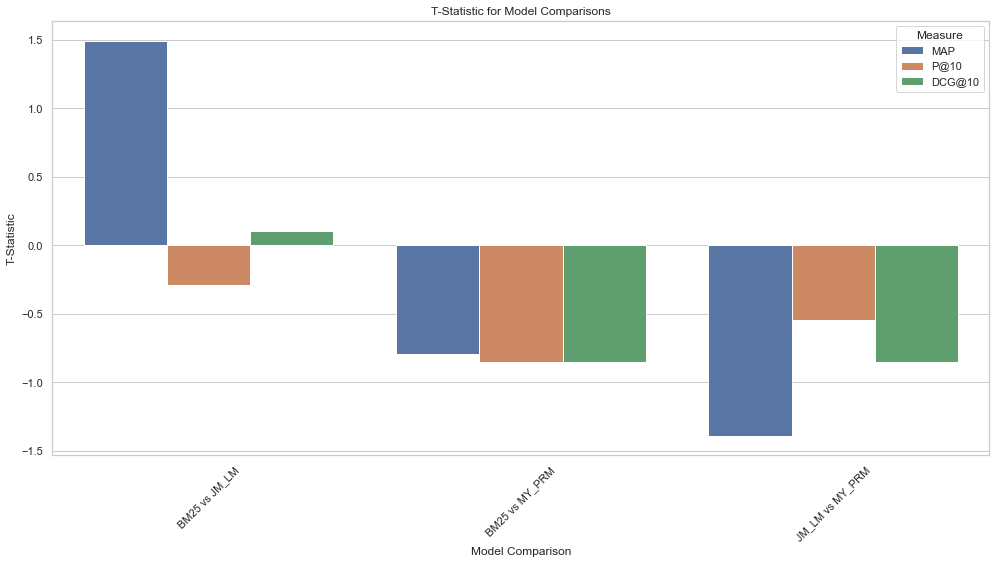

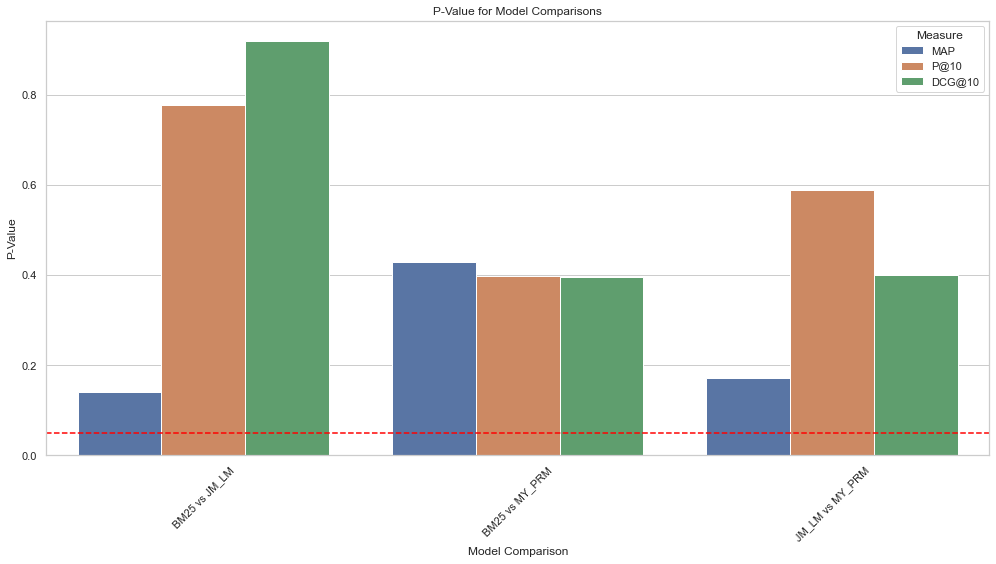

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot for T-Statistic
plt.figure(figsize=(14, 8))
sns.barplot(x='Comparison', y='T-Statistic', hue='Measure', data=ttest_results_df)
plt.title('T-Statistic for Model Comparisons')
plt.xlabel('Model Comparison')
plt.ylabel('T-Statistic')
plt.legend(title='Measure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for P-Value
plt.figure(figsize=(14, 8))
sns.barplot(x='Comparison', y='P-Value', hue='Measure', data=ttest_results_df)
plt.title('P-Value for Model Comparisons')
plt.xlabel('Model Comparison')
plt.ylabel('P-Value')
plt.legend(title='Measure')
plt.xticks(rotation=45)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.tight_layout()
plt.show()
